### Programming exercise 1:

In [9]:
import numpy as np
from scipy import stats
data_1 = np.loadtxt('data1.txt', delimiter='\n')
data_2 = np.loadtxt('data2.txt', delimiter='\n')
x = np.concatenate((data_1, data_2))
k2, p = stats.normaltest(x)
significance_level = 0.05
print("p = {:g}".format(p))

if p > significance_level:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')


p = 0.000124818
Sample does not look Gaussian (reject H0)


### Programming exercise 2:

In [10]:
from numpy import random, sqrt, log, sin, cos, pi

# transformation function
def gaussian(n,mu,sigma):
    # uniformly distributed values between 0 and 1
    np.random.seed(28041990)
    u1 = random.rand(n)
    u2 = random.rand(n)
    
    z1= sqrt(-2*log(u1))*cos(2*pi*u2)
    z2 = sqrt(-2*log(u1))*sin(2*pi*u2)
    return z1*sigma + mu, z2*sigma + mu

    

In [11]:
z1,z2 = gaussian(1000,10, 2.5)
x = np.concatenate((z1, z2))
k2, p = stats.normaltest(x)
significance_level = 0.05
print("p = {:g}".format(p))

if p > significance_level:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

p = 0.633886
Sample looks Gaussian (fail to reject H0)


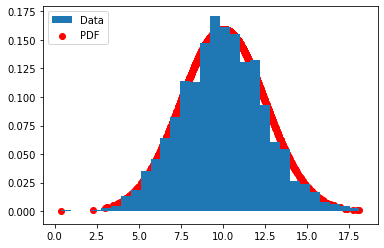

In [12]:
from pylab import show,hist,subplot,figure
import matplotlib.pyplot as plt
from scipy.stats import norm
plt.hist(x, density=True, bins=30, label="Data")
plt.scatter(x, norm.pdf(x,10, 2.5),color= 'red',  label="PDF")
plt.legend(loc="upper left")
plt.show()

### Programming exercise 3:

In [13]:
import pandas as pd

In [14]:
iris_data = pd.read_csv("iris_data.csv")

In [15]:
iris_data.head()

,# sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species (0: setosa,1: versicolor,2: virginica)
0,5.1,3.5,1.4,0.2,0.0,NaN,NaN
1,4.9,3.0,1.4,0.2,0.0,NaN,NaN
2,4.7,3.2,1.3,0.2,0.0,NaN,NaN
3,4.6,3.1,1.5,0.2,0.0,NaN,NaN
4,5.0,3.6,1.4,0.2,0.0,NaN,NaN


In [16]:
from sklearn.preprocessing import StandardScaler
features = ['# sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
x = iris_data.loc[:, features].values

In [17]:
x = StandardScaler().fit_transform(x)


In [18]:
pd.DataFrame(data = x, columns = features).head()

,# sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

In [20]:
principalDf.head()

,principal component 1,principal component 2,principal component 3
0,-2.264703,0.480027,-0.127706
1,-2.080961,-0.674134,-0.234609
2,-2.364229,-0.341908,0.044201
3,-2.299384,-0.597395,0.091290
4,-2.389842,0.646835,0.015738


In [21]:
def set_species_name(coulum):
    
    if coulum['species'] == '0.0':
        val = 'setosa'
        print(coulum['species'])
    elif coulum['species'] == 1.0:
        val = 'versicolor'
    else:
        val = 'virginica'
    return val

In [22]:
finalDf = pd.concat([principalDf, iris_data.iloc[:,-3]], axis = 1)
finalDf = finalDf.rename(columns={'species (0: setosa': 'species'})


In [23]:
 tst['species'] = finalDf.apply(set_species_name, axis=1)
# finalDf.tail()

NameError: name 'tst' is not defined

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


species = [0.0, 1.0, 2.0]
colors = ['r', 'g', 'b']
for specie, color in zip(species,colors):
    indicesToKeep = finalDf['species'] == specie
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(['setosa', 'Versicolour','Virginica'])
ax.grid()

In [ ]:
variance = pca.explained_variance_ratio_

In [ ]:
y = finalDf['species'].values
# y = np.int_(y)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
centers = [[1, 1], [-1, -1], [1, -1]]
fig = plt.figure(1, figsize=(18, 17))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

X = principalComponents
for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
# y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

# ax.w_xaxis.set_ticklabels([])
# ax.w_yaxis.set_ticklabels([])
# ax.w_zaxis.set_ticklabels([])
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")


plt.show()

In [ ]:
X